In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2025-11-13 08:18:34.975402: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-13 08:18:35.072013: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-13 08:18:36.805461: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
# Step 2: Load dataset
data = pd.read_csv("s_performance.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
# Step 3: Separate features and target
X = data.drop("Exam_Score", axis=1)
y = data["Exam_Score"]

In [6]:
# Step 4: Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

In [17]:
X_encoded

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0


In [7]:
# Step 5: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [8]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
# Step 7: Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output
])

In [22]:
# Step 8: Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [23]:

# Step 9: Train model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2164.3416 - mae: 39.3202
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.4846 - mae: 5.1885
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.4618 - mae: 4.4667
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.0623 - mae: 3.8767
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.0461 - mae: 3.4389
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5115 - mae: 3.0887
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.1100 - mae: 2.8212
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.2772 - mae: 2.5931
Epoch 9/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.8871 - mae: 2.4147
Epoch 10/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.7657 - mae: 2.2502
Epoch 11/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8798 - mae: 2.1188 
Epoch 12/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1857 - mae: 2.0034

In [24]:
# Step 10: Evaluate model
loss, mae = model.evaluate(X_test, y_test, verbose=0)

In [25]:
# Step 11: Predict
y_pred = model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [26]:
# Step 12: Calculate R² score (acts as accuracy for regression)
r2 = r2_score(y_test, y_pred)
print(f"\nTest Mean Absolute Error: {mae:.2f}")
print(f"Model Accuracy (R² Score): {r2*100:.2f}%")


Test Mean Absolute Error: 1.11
Model Accuracy (R² Score): 66.75%


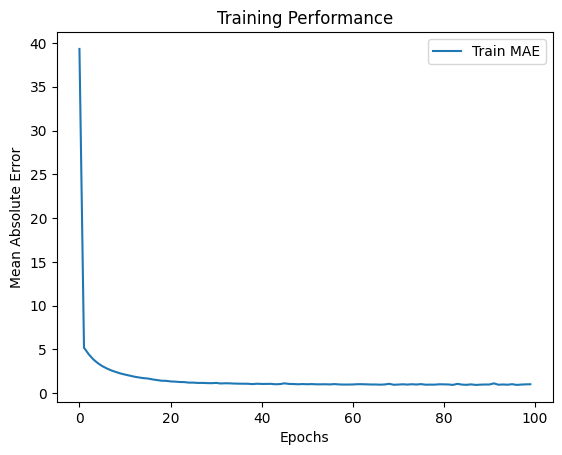

In [28]:
# Step 13: Plot training performance
plt.plot(history.history['mae'], label='Train MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training Performance')
plt.show()